In [2]:
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
df.shape

(3066766, 19)

In [6]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)


In [7]:
df.duration.std()

42.594351241920904

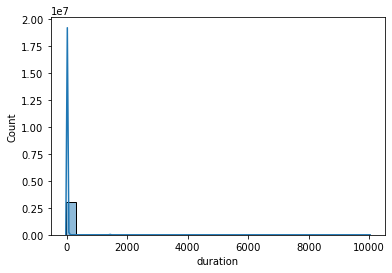

In [8]:
sns.histplot(df['duration'], bins=30, kde=True)
plt.show()

In [9]:
df.duration.describe(percentiles=[0.90, 0.92, 0.95, 0.98])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
90%      2.794167e+01
92%      3.055000e+01
95%      3.646667e+01
98%      4.873333e+01
max      1.002918e+04
Name: duration, dtype: float64

In [10]:
filtered_df=df[(df.duration >=1) & (df.duration <=60 )]

In [11]:
fraction_left = len(filtered_df) / len(df)
print(f"Fraction of records left: {fraction_left:.2f}")


Fraction of records left: 0.98


In [12]:
df=filtered_df

In [13]:
df['PULocationID'] = df['PULocationID'].astype(str)
df['DOLocationID'] = df['DOLocationID'].astype(str)

In [14]:
categorical= ['PULocationID', 'DOLocationID']
numerical =['trip_distance']

In [15]:
df[categorical]=df[categorical].astype(str)

In [16]:
dv=DictVectorizer()

train_dicts=df[categorical ].to_dict(orient='records')
X_train= dv.fit_transform(train_dicts)

In [17]:
X_train.shape

(3009173, 515)

In [18]:
target = 'duration'
y_train = df[target].values

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred=lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.6492610279057605

In [23]:
def read_datafram(filelink):
    df=pd.read_parquet(filelink)

    df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
    df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

    df=df[(df.duration >=1) & (df.duration <=60 )]

    categorical= ['PULocationID', 'DOLocationID']

    df[categorical]=df[categorical].astype(str)
    
    return df

In [24]:
df_val=read_datafram('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [25]:
categorical= ['PULocationID', 'DOLocationID']
numerical =['trip_distance']

val_dicts=df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [26]:
target = 'duration'

y_val= df_val[target].values

In [27]:
y_pred=lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.81183265470218